In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
# from deprecated.Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline, ChipResonatorsTwoTlines
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

# Kinetic inductances definitions

In [3]:
Lk_12 = 12e-12 # For SiTUD20
Lk_24 = 24e-12 # For SiSC10
Lk_61 = 61e-12 # For GeHarry8
Lk_232 = 232e-12 # For SiChip5
epsilon_r_Si = 11.9
epsilon_r_Ge = [15.18, 16, 15.18, 16, 11.9]
thickness_subs_Si = 500e-6
thickness_subs_Ge = [50e-9, 20e-9, 600e-9, 300e-9, 600e-6]


In [4]:
FeedlineWidth12 = 80
FeedlineLength12  = 3000
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12, length_CPW=(FeedlineLength12 + FeedlineTaperLength12 + BondpadLength12)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 49.639793350566244 Ohm
Frequency of the feedline is 3.7987915879251455 GHz


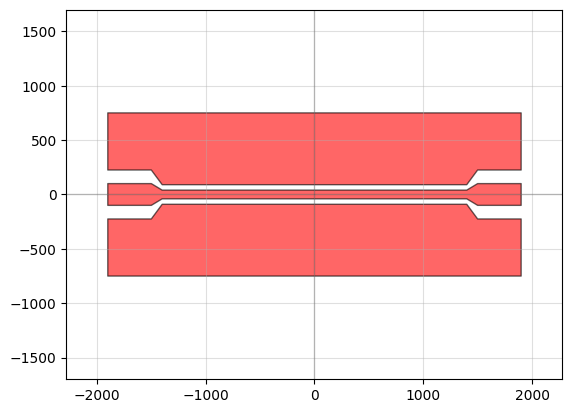

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-Tline-v3.gds'

In [19]:
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1500]

_, _, TLine12 = ChipTline(ChipSize12,
                          FeedlineWidth12, 
                          FeedlineLength12, 
                          FeedlineGap12, 
                          FeedlineTaperLength12, 
                          BondpadWidth12, 
                          BondpadLength12, 
                          BondpadGap12)
qp(TLine12)
TLine12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-Tline-v3.gds")


Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [ 539.  651.  785.  975. 1245. 1680.]
The frequencies are [5.483827086913992, 4.991027426535848, 4.545848001063532, 4.079440871907611, 3.6104543603373203, 3.10834496121298]


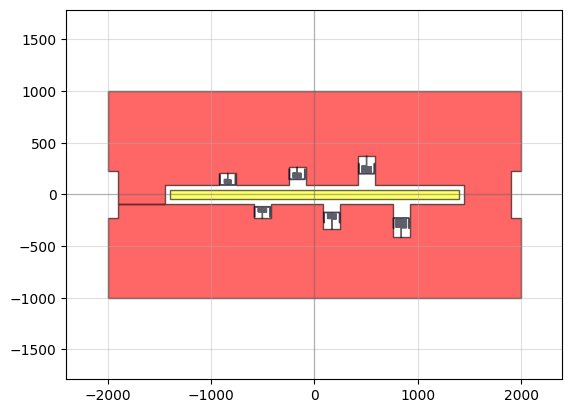

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-v3-simulation.gds'

In [10]:

SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 6

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[ 6, 6, 8, 9, 11, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[ 62,  78,  75,  82,  90,  100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*( [55,55] + [50] + [90]*3)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*np.sort(np.linspace(136,0,6))
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 2800
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=True)

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-v3-simulation.gds")


Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [ 539.  651.  785.  975. 1245. 1680.]
The frequencies are [5.483827086913992, 4.991027426535848, 4.545848001063532, 4.079440871907611, 3.6104543603373203, 3.10834496121298]


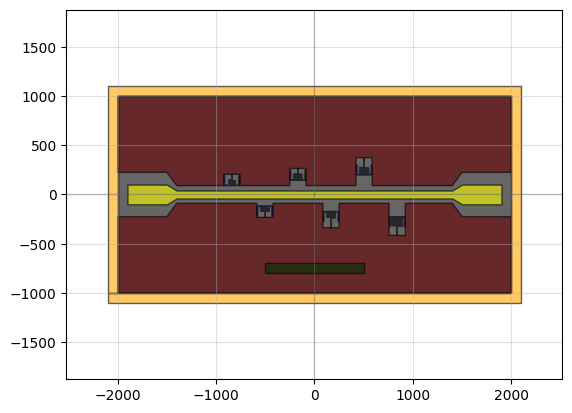

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-v3-2x4.gds'

In [17]:

SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 6

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[ 6, 6, 8, 9, 11, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[ 62,  78,  75,  82,  90,  100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*( [55,55] + [50] + [90]*3)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*np.sort(np.linspace(136,0,6))
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 2800
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=False)

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-v3-2x4.gds")


Ansys

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [ 539.  651.  785.  975. 1245. 1680.]
The frequencies are [5.483827086913992, 4.991027426535848, 4.545848001063532, 4.079440871907611, 3.6104543603373203, 3.10834496121298]


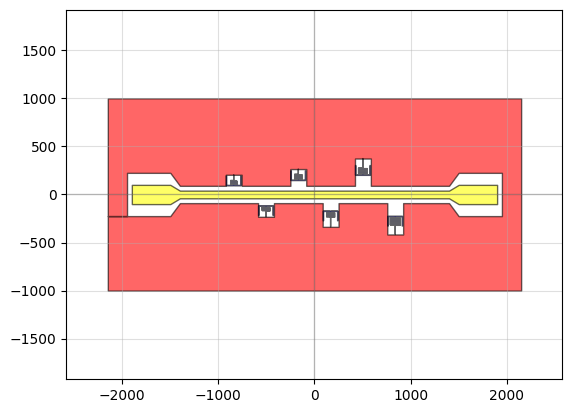

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-v3-capsim.gds'

In [18]:

SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 6

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[ 6, 6, 8, 9, 11, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[ 62,  78,  75,  82,  90,  100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*( [55,55] + [50] + [90]*3)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*np.sort(np.linspace(136,0,6))
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 2800
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, cap_sim=True)

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-v3-capsim.gds")


Chip

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [ 539.  651.  785.  975. 1245. 1680.]
The frequencies are [5.483827086913992, 4.991027426535848, 4.545848001063532, 4.079440871907611, 3.6104543603373203, 3.10834496121298]


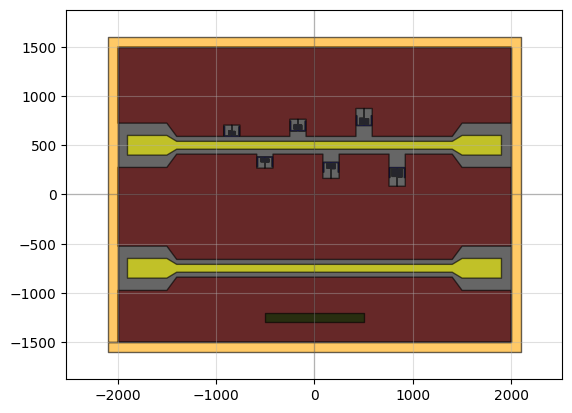

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-v3-Tline.gds'

In [15]:

SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 6

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[ 6, 6, 8, 9, 11, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[ 62,  78,  75,  82,  90,  100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*( [55,55] + [50] + [90]*3)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*np.sort(np.linspace(136,0,6))
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 2800
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 3000]

c, metal, chip12 = ChipResonatorsTwoTlines(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=False, ypos_tlines=[500, -750])

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-v3-Tline.gds")


Qc extraction

In [13]:
import pandas as pd
path = r'D:\Ansys-Projects\202507-SiRes-12pHsq-v3'
file_list = os.listdir(path)
# print(file_list)
C0 = []
Cc= []


for file in file_list:
    name = file.split('.')
    if name[0] == 'c0':
        C0 = -1e-15*np.array(pd.read_csv(os.path.join(path, file)).values[0][1:])
    elif name[0] == 'cc':
        Cc = -1e-15*np.array(pd.read_csv(os.path.join(path, file)).values[0][1:])



In [26]:
def Qc(C0,Cc, w, Zl0=50):
    R = (1+w**2 * Cc**2 * Zl0**2)/(w**2 * Cc**2 * Zl0)
    Qc = w * C0 * R/2
    for i,qc in enumerate(Qc):
        Qc[i] = int(qc)
    return Qc

def Qc_other(C0, Cc, w, Zl0=50):
    Qc = (C0+Cc)/(w*Zl0*Cc**2)
    for i,qc in enumerate(Qc):
        Qc[i] = int(qc)
    return Qc


In [8]:
w_sim  = 1e9*np.array([3.017,3.644,4.153,4.416,4.793,5.303])
w_meas = 1e9*np.array([])

In [29]:
Qc_sim = Qc(C0,Cc,w_sim)
Qc_other_sim = Qc_other(C0,Cc,w_sim)
#Qc_meas = Qc(C0,Cc,w_meas)
print(f'The simulated Qc are {Qc_sim}')
print(f'The simulated Qc (other) are {Qc_other_sim}')

The simulated Qc are [ 1936.  3496.  5744.  8748. 12558. 16332.]
The simulated Qc (other) are [ 4730.  7997. 12662. 18861. 26642. 34248.]


## 2x7mm chips

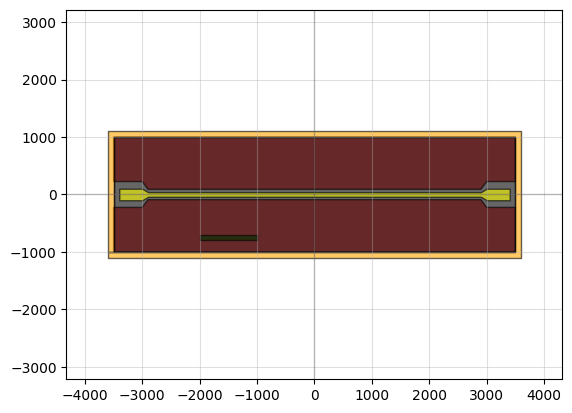

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-v3-2x7-Tline.gds'

In [11]:
FeedlineWidth12 = 80
FeedlineLength12  = 5800
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)
FinalSpacingBondpads12 = 100
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12+ 2*FinalSpacingBondpads12, 2000]

_, _, TLine12 = ChipTline(ChipSize12,
                          FeedlineWidth12, 
                          FeedlineLength12, 
                          FeedlineGap12, 
                          FeedlineTaperLength12, 
                          BondpadWidth12, 
                          BondpadLength12, 
                          BondpadGap12)

qp(TLine12)
TLine12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-v3-2x7-Tline.gds")


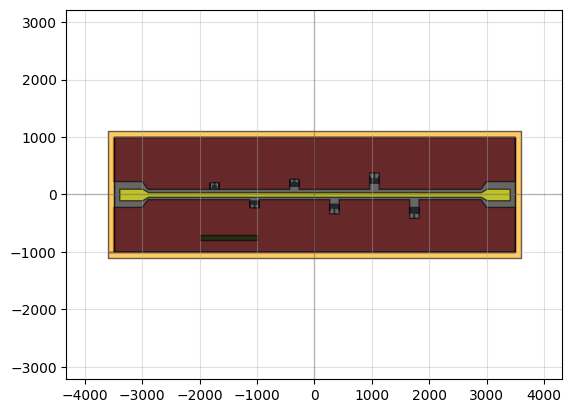

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-v3-2x7-original.gds'

In [18]:
SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 6

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[ 6, 6, 8, 9, 11, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[ 62,  78,  75,  82,  90,  100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*( [55,55] + [50] + [90]*3)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*np.sort(np.linspace(136,0,6))
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

FeedlineWidth12 = 80
FeedlineLength12  = 5800
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)
FinalSpacingBondpads12 = 100
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12+ 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=False)

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-v3-2x7-original.gds")

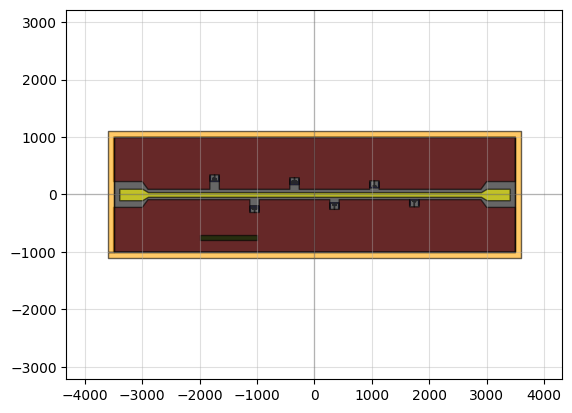

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-v3-2x7-new.gds'

In [ ]:
NumberOfResonators = 6
SeparationTlineResonator = np.zeros(NumberOfResonators)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*100
CapacitorWidth = np.ones(NumberOfResonators)*5

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[ 6, 6, 8,4,3,2]
InductorVerticalLength = np.ones(NumberOfResonators)*5
InductorHorizontalLength= np.ones(NumberOfResonators)*[ 62,  78,  75,50,50,40] 
InductorEndLength = np.ones(NumberOfResonators)*( [55,55] + [50] + [65, 75, 85])
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20

SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*np.linspace(136,0,6)
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12+ 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False)

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-v3-2x7-new.gds")

# v4


Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [539. 651. 785. 355. 310. 235.]
The frequencies are [5.487518567050608, 4.992846434536077, 4.546377244230859, 6.759570044643828, 7.2323851718439265, 8.304596908339215]


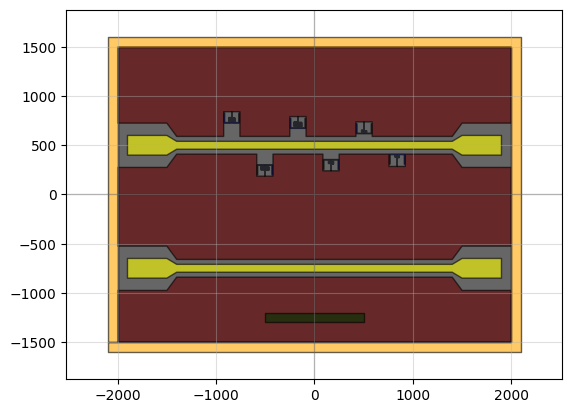

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202508-SiRes-12pHsq-v4\\202507-SiRes-12pHsq-v4.gds'

In [23]:

SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 6

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[ 6, 6, 8,4,3,2]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[ 62,  78,  75,50,50,40] 
InductorEndLength12 = np.ones(NumberOfResonators12)*( [55,55] + [50] + [65, 75, 85])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*np.linspace(136,0,6)
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 2800
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 3000]

c, metal, chip12 = ChipResonatorsTwoTlines(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=False, ypos_tlines=[500, -750])

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202508-SiRes-12pHsq-v4\202507-SiRes-12pHsq-v4.gds")
